In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [6]:
titanic = pd.concat([train, test], axis=0)

In [11]:
titanic.drop(columns = ['Survived'])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [45]:
titanic['Fare'].fillna(titanic['Fare'].mean)

0         7.25
1      71.2833
2        7.925
3         53.1
4         8.05
        ...   
413       8.05
414      108.9
415       7.25
416       8.05
417    22.3583
Name: Fare, Length: 1309, dtype: object

In [47]:
titanic['Fare'].isna().sum()

np.int64(0)

In [54]:
titanic['Fare'] = pd.to_numeric(titanic['Fare'], errors='coerce')

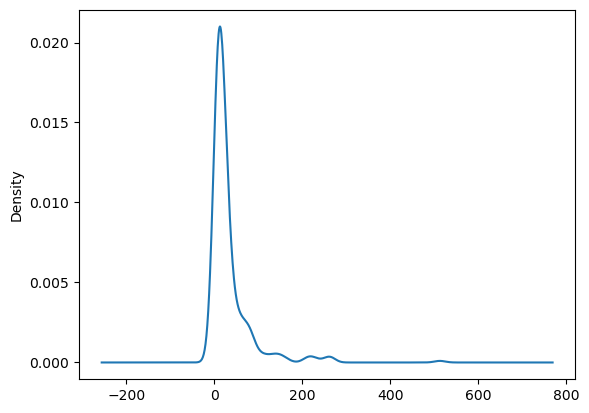

In [55]:
titanic['Fare'].plot.kde()
plt.show()

In [56]:
# Sample size = 50, number of samples = 100
samples = []
for i in range(100):
    samples.append(titanic['Fare'].sample(50).values.tolist())

In [57]:
samples = np.array(samples)

In [59]:
samples

array([[  7.8958,  36.75  , 120.    , ...,  31.3875,  55.9   ,  73.5   ],
       [ 27.7208,   7.75  ,  26.    , ...,  16.1   ,   8.6625,  17.8   ],
       [ 16.1   ,   8.6625,   7.75  , ..., 227.525 ,  35.5   ,   7.8958],
       ...,
       [  0.    ,   7.05  ,  10.4625, ...,  27.75  ,  36.75  ,  26.    ],
       [  7.925 ,  17.4   ,  32.5   , ...,  14.4542,   6.4958,   7.55  ],
       [  7.8958,   7.8792, 133.65  , ...,  83.475 ,  10.5   ,   7.75  ]])

In [61]:
sampling_means = np.mean(samples, axis=1)

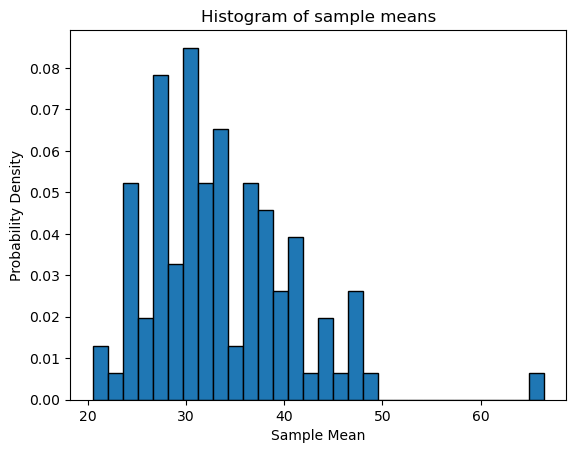

In [62]:
plt.hist(sampling_means, bins=30, density=True, edgecolor='black')
plt.title('Histogram of sample means')
plt.xlabel('Sample Mean')
plt.ylabel('Probability Density')
plt.show()

<Axes: ylabel='Density'>

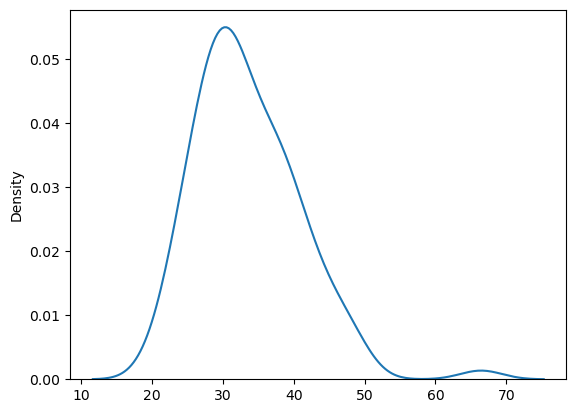

In [63]:
sns.kdeplot(sampling_means)

In [64]:
clt_mean = sampling_means.mean()
data_mean = titanic['Fare'].mean()

np.float64(33.5333886)

In [76]:
SE = sampling_means.std() / np.sqrt(50)
SE

np.float64(1.0404868022603717)

In [77]:
# -2*SE and 2*SE is the confidence region
# (31-35)

In [82]:
lower_limit = round(sampling_means.mean() - 2*SE, 2)
upper_limit = round(sampling_means.mean() + 2*SE, 2)

In [83]:
print("The confidence range is", lower_limit,"to",upper_limit)

The range is 31.45 to 35.61


<Axes: ylabel='Frequency'>

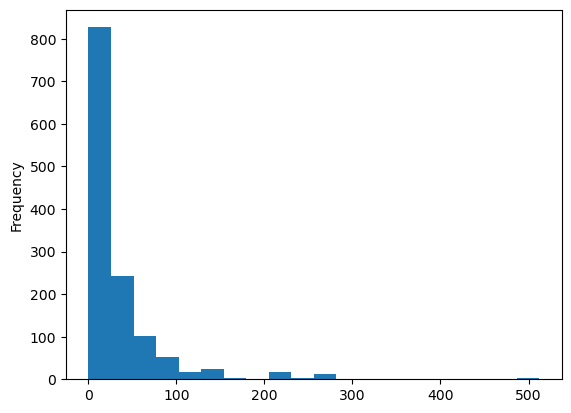

In [90]:
titanic['Fare'].plot(kind='hist', bins=20)